<a href="https://colab.research.google.com/github/TofayelAhamedTopu/Machine_Learning_Data_Visualization/blob/main/Human_Activity_Recognition_Using_Smartphone_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Prayer Activity Recognition Using Smartphone/PAR_Data.csv')
df

,Acc_X,Acc_Y,Acc_Z,Gyro_X,Gyro_Y,Gyro_Z,Mag_X,Mag_Y,Mag_Z,Activity,Label
0,-1.201795,-9.996614,0.222533,-0.007057,-0.007856,-0.008655,-21.154800,42.516998,-12.663600,Qayyam,A
1,-1.220938,-10.008579,0.244068,0.005726,-0.005726,-0.005459,-21.167000,42.553600,-12.761200,Qayyam,A
2,-1.161117,-10.057034,0.193819,0.020639,0.009188,-0.001198,-21.191401,42.577999,-12.956400,Qayyam,A
3,-1.173081,-9.970294,0.296710,0.024900,-0.002530,0.005193,-21.191401,42.577999,-12.907599,Qayyam,A
4,-1.002593,-9.975080,0.234497,0.040878,-0.025965,0.021172,-21.227999,42.565800,-12.895400,Qayyam,A
...,...,...,...,...,...,...,...,...,...,...,...
26526,-2.217548,-9.618548,0.828515,0.036085,0.094273,-0.028761,-11.748600,9.198800,-25.534599,Sijdah_two,E
26527,-2.197808,-9.757333,0.840479,0.042476,0.123034,-0.038348,-11.785200,9.223200,-25.559000,Sijdah_two,E
26528,-2.202593,-9.924830,0.821336,0.032889,0.126230,-0.039414,-11.773000,9.247600,-25.510199,Sijdah_two,E
26529,-2.197808,-9.819546,0.778266,0.019041,0.080425,-0.029827,-11.760799,9.223200,-25.461399,Sijdah_two,E


In [ ]:
#add index column
df['index'] = np.arange(df.shape[0])
df.head()

,Acc_X,Acc_Y,Acc_Z,Gyro_X,Gyro_Y,Gyro_Z,Mag_X,Mag_Y,Mag_Z,Activity,Label,index
0,-1.201795,-9.996614,0.222533,-0.007057,-0.007856,-0.008655,-21.154800,42.516998,-12.663600,Qayyam,A,0
1,-1.220938,-10.008579,0.244068,0.005726,-0.005726,-0.005459,-21.167000,42.553600,-12.761200,Qayyam,A,1
2,-1.161117,-10.057034,0.193819,0.020639,0.009188,-0.001198,-21.191401,42.577999,-12.956400,Qayyam,A,2
3,-1.173081,-9.970294,0.296710,0.024900,-0.002530,0.005193,-21.191401,42.577999,-12.907599,Qayyam,A,3
4,-1.002593,-9.975080,0.234497,0.040878,-0.025965,0.021172,-21.227999,42.565800,-12.895400,Qayyam,A,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26531 entries, 0 to 26530
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Acc_X     26531 non-null  float64
 1   Acc_Y     26531 non-null  float64
 2   Acc_Z     26531 non-null  float64
 3   Gyro_X    26531 non-null  float64
 4   Gyro_Y    26531 non-null  float64
 5   Gyro_Z    26531 non-null  float64
 6   Mag_X     26531 non-null  float64
 7   Mag_Y     26531 non-null  float64
 8   Mag_Z     26531 non-null  float64
 9   Activity  26531 non-null  object 
 10  Label     26531 non-null  object 
 11  index     26531 non-null  int64  
dtypes: float64(9), int64(1), object(2)
memory usage: 2.4+ MB


In [ ]:
df['Label'].value_counts()

A    14416
B     4221
E     3762
C     3646
D      486
Name: Label, dtype: int64

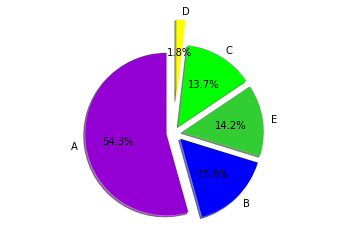

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
labels = 'A','B','E','C','D',
sizes = [14416,4221,3762,3646,486,]
colors = ['#9400D3','#0000FF','#32CD32','#00FF00','#FFFF00','#FF7F00','#BF360C','#87CEEB']
explode = (0.1,0.1,0.1,0.1,.4)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True,startangle=90)

plt.axis('equal')
plt.show()
plt.savefig('chart.png')

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df["Label"] = le.fit_transform(df["Label"])
le.classes_

array(['A', 'B', 'C', 'D', 'E'], dtype=object)

In [ ]:
Acc_scaling = df.iloc[:, 0:3]
Gyro_scaling = df.iloc[:, 3:6]
Mag_scaling = df.iloc[:, 6:9]

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_dfAcc = ss.fit_transform(Acc_scaling)
scaled_dfGyro = ss.fit_transform(Gyro_scaling)
scaled_dfMag = ss.fit_transform(Mag_scaling)
scaled_dfAcc = pd.DataFrame(scaled_dfAcc, columns = ['Acc_X', 'Acc_Y', 'Acc_Z'])
scaled_dfGyro = pd.DataFrame(scaled_dfGyro, columns = ['Gyro_X', 'Gyro_Y', 'Gyro_Z'])
scaled_dfMag = pd.DataFrame(scaled_dfMag, columns = ['Mag_X', 'Mag_Y', 'Mag_Z'])

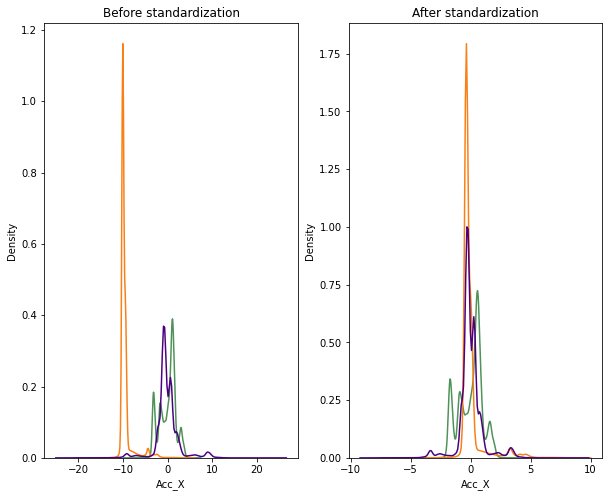

In [ ]:
# Plot and visualize the results
import seaborn as sns
fig,(ax1, ax2) = plt.subplots(ncols = 2, figsize = (10,8))

ax1.set_title('Before standardization')
sns.kdeplot(Acc_scaling['Acc_X'], ax=ax1,color='#4E9258')
sns.kdeplot(Acc_scaling['Acc_Y'], ax=ax1,color='#F88017')
sns.kdeplot(Acc_scaling['Acc_Z'], ax=ax1,color='#4B0082')

ax2.set_title('After standardization')
sns.kdeplot(scaled_dfAcc['Acc_X'], ax=ax2,color='#4E9258')
sns.kdeplot(scaled_dfAcc['Acc_Y'], ax=ax2,color='#F88017')
sns.kdeplot(scaled_dfAcc['Acc_Z'], ax=ax2,color='#4B0082')
plt.show()

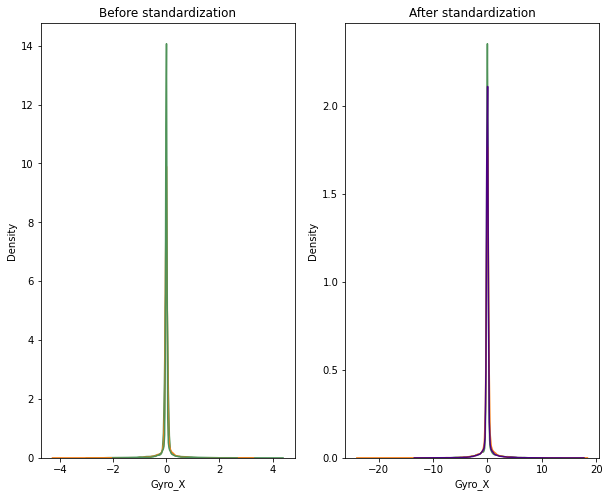

In [ ]:
# Plot and visualize the results
fig,(ax1, ax2) = plt.subplots(ncols = 2, figsize = (10,8))

ax1.set_title('Before standardization')
sns.kdeplot(Gyro_scaling['Gyro_X'], ax=ax1,color='#4E9258')
sns.kdeplot(Gyro_scaling['Gyro_Y'], ax=ax1,color='#F88017')
sns.kdeplot(Gyro_scaling['Gyro_Z'], ax=ax1,color='#4E9258')

ax2.set_title('After standardization')
sns.kdeplot(scaled_dfGyro['Gyro_X'], ax=ax2,color='#4E9258')
sns.kdeplot(scaled_dfGyro['Gyro_Y'], ax=ax2,color='#F88017')
sns.kdeplot(scaled_dfGyro['Gyro_Z'], ax=ax2,color='#4B0082')
plt.show()

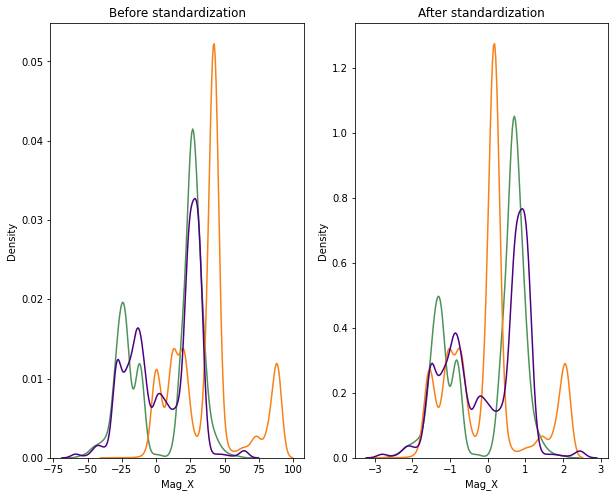

In [ ]:
# Plot and visualize the results
fig,(ax1, ax2) = plt.subplots(ncols = 2, figsize = (10,8))

ax1.set_title('Before standardization')
sns.kdeplot(Mag_scaling['Mag_X'], ax=ax1,color='#4E9258')
sns.kdeplot(Mag_scaling['Mag_Y'], ax=ax1,color='#F88017')
sns.kdeplot(Mag_scaling['Mag_Z'], ax=ax1,color='#4B0082')

ax2.set_title('After standardization')
sns.kdeplot(scaled_dfMag['Mag_X'], ax=ax2,color='#4E9258')
sns.kdeplot(scaled_dfMag['Mag_Y'], ax=ax2,color='#F88017')
sns.kdeplot(scaled_dfMag['Mag_Z'], ax=ax2,color='#4B0082')
plt.show()

In [ ]:
df1=scaled_dfAcc.join(scaled_dfGyro).join(scaled_dfMag).join(df['Label'])

In [ ]:
df2=df1.copy()
df2['index'] = np.arange(df2.shape[0])
df2.head()

,Acc_X,Acc_Y,Acc_Z,Gyro_X,Gyro_Y,Gyro_Z,Mag_X,Mag_Y,Mag_Z,Label,index
0,-0.671069,-0.347310,0.103451,-0.023229,-0.028057,-0.061873,-1.185799,0.183963,-0.835826,0,0
1,-0.681378,-0.355059,0.111401,0.011547,-0.016107,-0.040566,-1.186280,0.185462,-0.839989,0,1
2,-0.649162,-0.386438,0.092851,0.052118,0.067550,-0.012156,-1.187243,0.186462,-0.848314,0,2
3,-0.655605,-0.330265,0.130833,0.063710,0.001820,0.030459,-1.187243,0.186462,-0.846233,0,3
4,-0.563787,-0.333364,0.107867,0.107179,-0.129640,0.136995,-1.188686,0.185962,-0.845712,0,4


## Data Visualization

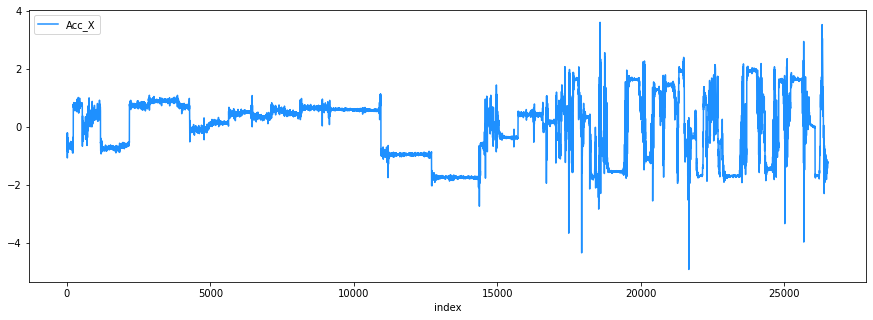

In [ ]:
df2.plot.line(x='index',y=(['Acc_X']),figsize=(15,5),color='#1E90FF')

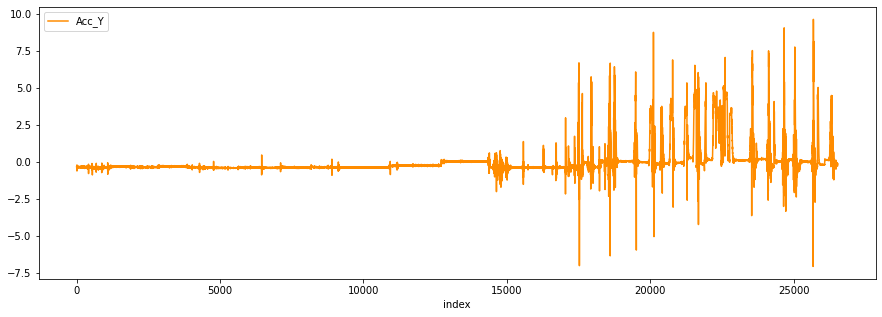

In [ ]:
df2.plot.line(x='index',y=(['Acc_Y']),figsize=(15,5),color='#FF8C00')

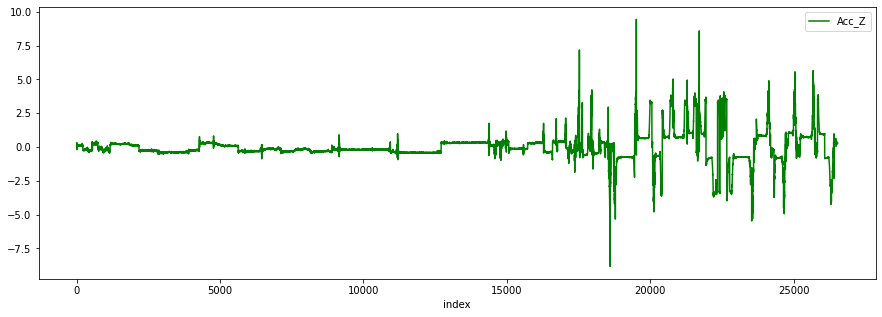

In [ ]:
df2.plot.line(x='index',y=(['Acc_Z']),figsize=(15,5),color='#008000')

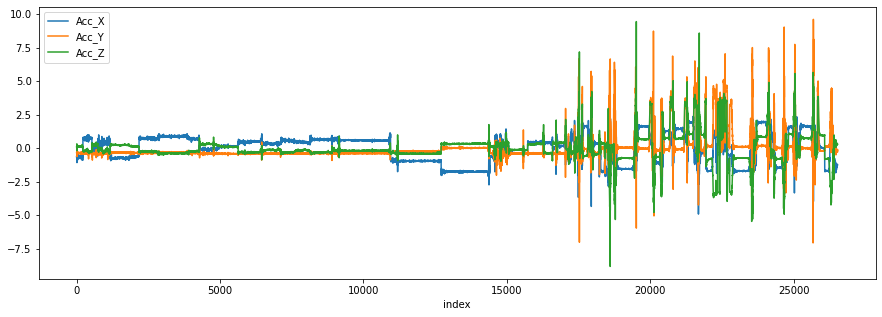

In [ ]:
#vusualization in accellerometer x,y,z axis data
df2.plot.line(x='index',y=(['Acc_X','Acc_Y','Acc_Z']),figsize=(15,5))

Gyroscope data visualization use plot line

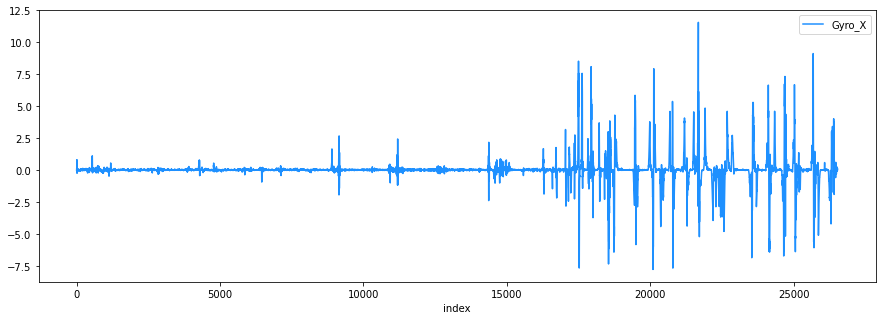

In [ ]:
df2.plot.line(x='index',y=(['Gyro_X']),figsize=(15,5),color='#1E90FF')

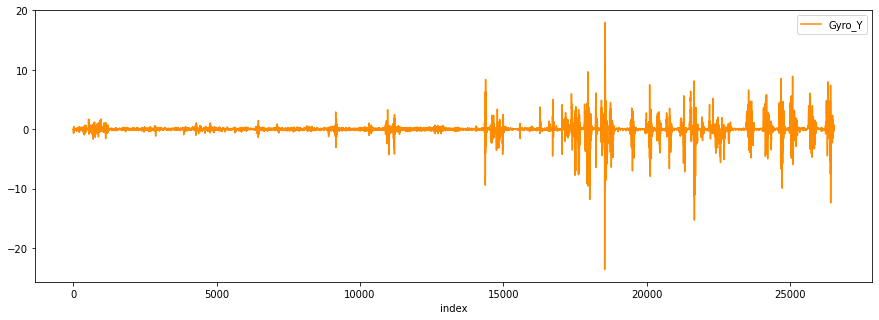

In [ ]:
df2.plot.line(x='index',y=(['Gyro_Y']),figsize=(15,5),color='#FF8C00')

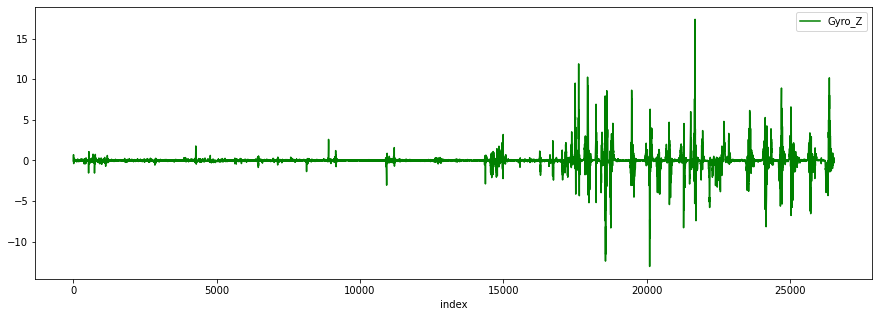

In [ ]:
df2.plot.line(x='index',y=(['Gyro_Z']),figsize=(15,5),color='#008000')

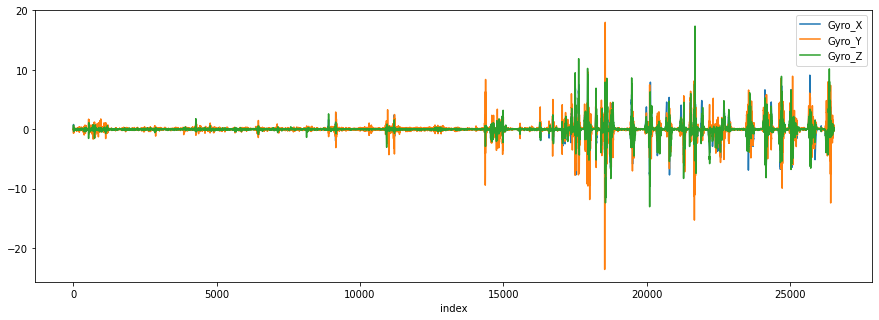

In [ ]:
df2.plot.line(x='index',y=(['Gyro_X','Gyro_Y','Gyro_Z']),figsize=(15,5))

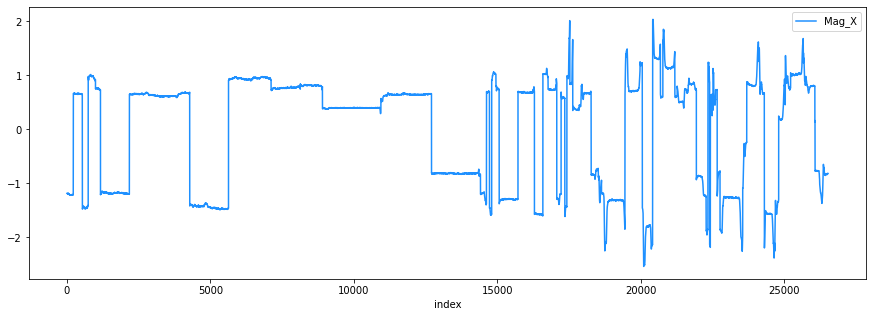

In [ ]:
df2.plot.line(x='index',y=(['Mag_X']),figsize=(15,5),color='#1E90FF')

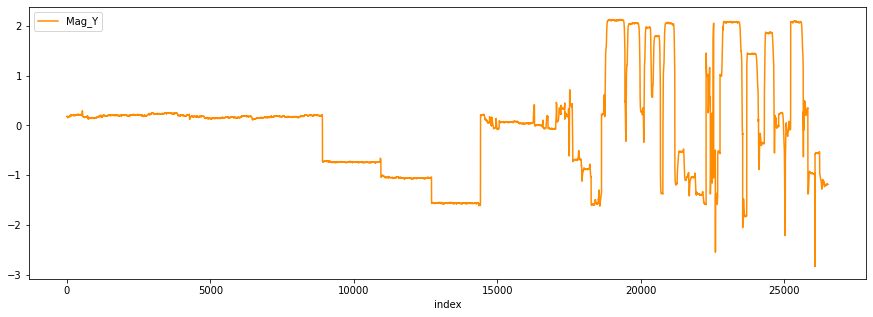

In [ ]:
df2.plot.line(x='index',y=(['Mag_Y']),figsize=(15,5),color='#FF8C00')

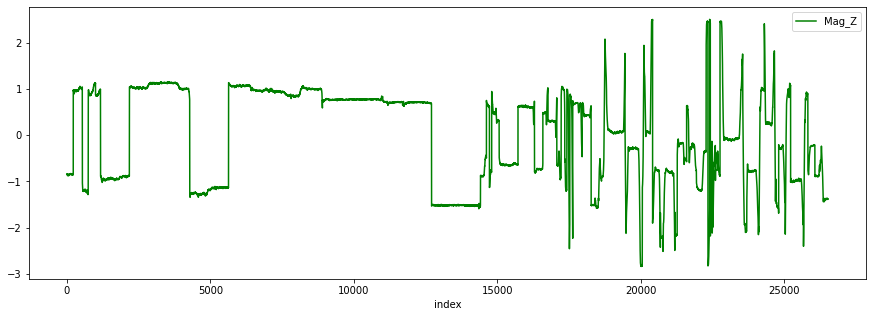

In [ ]:
df2.plot.line(x='index',y=(['Mag_Z']),figsize=(15,5),color='#008000')

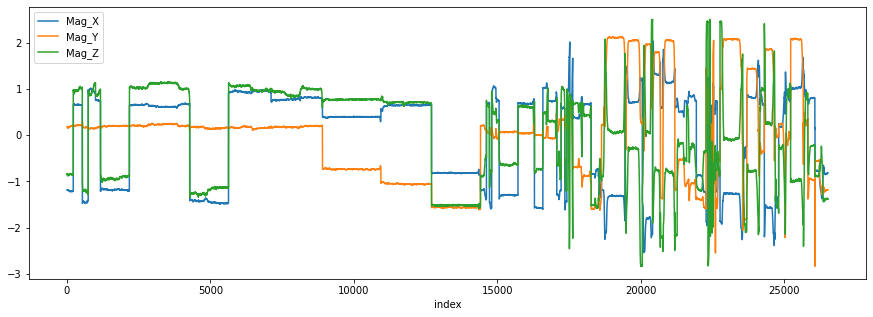

In [ ]:
df2.plot.line(x='index',y=(['Mag_X','Mag_Y','Mag_Z']),figsize=(15,5))

## 3D Scatter Plot for individual activities

No handles with labels found to put in legend.


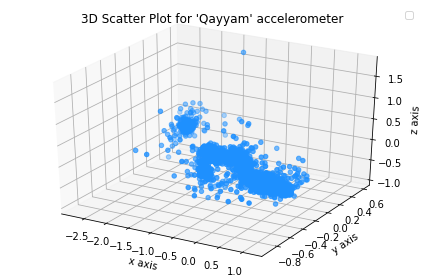

In [ ]:
#Here visualize (Qayyam) accelerometer data
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
df3=df2.copy()
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
dff=df3[df3['Label']==0]
x = dff['Acc_X']
y = dff['Acc_Y']
z = dff['Acc_Z']
ax.scatter( x, y, z, c='#1E90FF')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.title("3D Scatter Plot for 'Qayyam' accelerometer")
plt.legend()
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


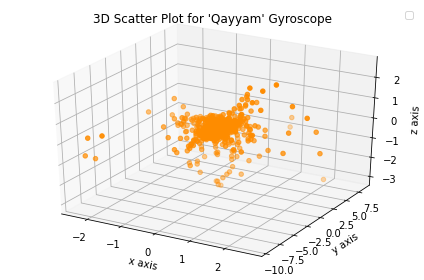

In [ ]:
#Here visualize (Qayyam) Gyroscope data
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
df3=df2.copy()
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
dff=df3[df3['Label']==0]
x = dff['Gyro_X']
y = dff['Gyro_Y']
z = dff['Gyro_Z']

ax.scatter( x, y, z, c='#FF8C00')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.title("3D Scatter Plot for 'Qayyam' Gyroscope")
plt.legend()
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


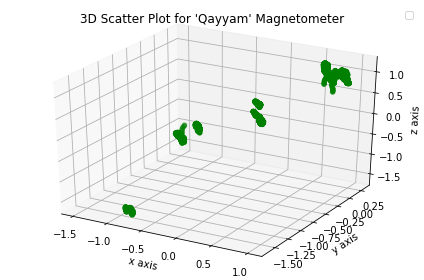

In [ ]:
#Here visualize (Qayyam) Magnetometer data
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
df3=df2.copy()
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
dff=df3[df3['Label']==0]
x = dff['Mag_X']
y = dff['Mag_Y']
z = dff['Mag_Z']

ax.scatter( x, y, z, c='#008000')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.title("3D Scatter Plot for 'Qayyam' Magnetometer")
plt.legend()
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


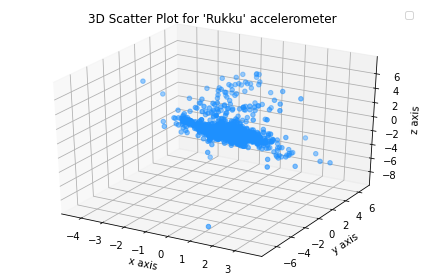

In [ ]:
#Here visualize (Rukku) accelerometer data
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
df3=df2.copy()
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
dff=df3[df3['Label']==1]
x = dff['Acc_X']
y = dff['Acc_Y']
z = dff['Acc_Z']
ax.scatter( x, y, z, c='#1E90FF')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.title("3D Scatter Plot for 'Rukku' accelerometer")
plt.legend()
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


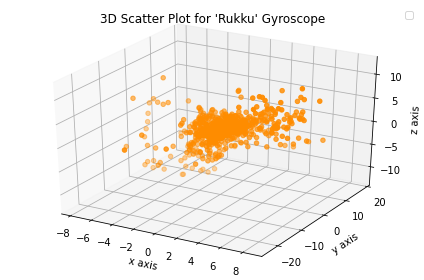

In [ ]:
#Here visualize (Rukku) Gyroscope data
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
df3=df2.copy()
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
dff=df3[df3['Label']==1]
x = dff['Gyro_X']
y = dff['Gyro_Y']
z = dff['Gyro_Z']

ax.scatter( x, y, z, c='#FF8C00')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.title("3D Scatter Plot for 'Rukku' Gyroscope")
plt.legend()
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


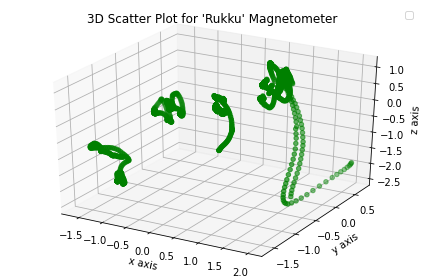

In [ ]:
#Here visualize (Rukku) Magnetometer data
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
df3=df2.copy()
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
dff=df3[df3['Label']==1]
x = dff['Mag_X']
y = dff['Mag_Y']
z = dff['Mag_Z']

ax.scatter( x, y, z, c='#008000')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.title("3D Scatter Plot for 'Rukku' Magnetometer")
plt.legend()
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


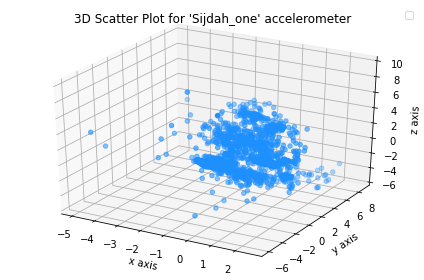

In [ ]:
#Here visualize (Sijdah_one) accelerometer data
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
df3=df2.copy()
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
dff=df3[df3['Label']==2]
x = dff['Acc_X']
y = dff['Acc_Y']
z = dff['Acc_Z']
ax.scatter( x, y, z, c='#1E90FF')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.title("3D Scatter Plot for 'Sijdah_one' accelerometer")
plt.legend()
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


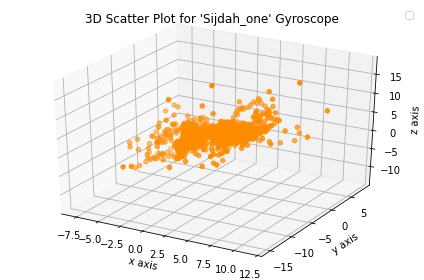

In [ ]:
#Here visualize (Sijdah_one ) Gyroscope data
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
df3=df2.copy()
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
dff=df3[df3['Label']==2]
x = dff['Gyro_X']
y = dff['Gyro_Y']
z = dff['Gyro_Z']

ax.scatter( x, y, z, c='#FF8C00')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.title("3D Scatter Plot for 'Sijdah_one' Gyroscope")
plt.legend()
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


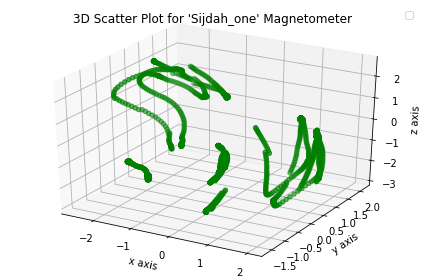

In [ ]:
#Here visualize (Sijdah_one) Magnetometer data
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
df3=df2.copy()
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
dff=df3[df3['Label']==2]
x = dff['Mag_X']
y = dff['Mag_Y']
z = dff['Mag_Z']

ax.scatter( x, y, z, c='#008000')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.title("3D Scatter Plot for 'Sijdah_one' Magnetometer")
plt.legend()
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


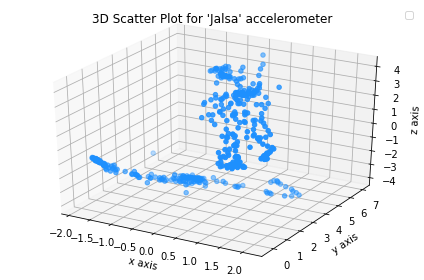

In [ ]:
#Here visualize (Jalsa) accelerometer data
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
df3=df2.copy()
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
dff=df3[df3['Label']==3]
x = dff['Acc_X']
y = dff['Acc_Y']
z = dff['Acc_Z']
ax.scatter( x, y, z, c='#1E90FF')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.title("3D Scatter Plot for 'Jalsa' accelerometer")
plt.legend()
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


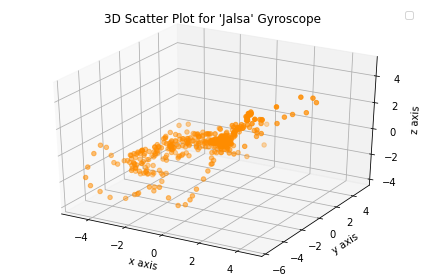

In [ ]:
#Here visualize (Jalsa) Gyroscope data
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
df3=df2.copy()
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
dff=df3[df3['Label']==3]
x = dff['Gyro_X']
y = dff['Gyro_Y']
z = dff['Gyro_Z']

ax.scatter( x, y, z, c='#FF8C00')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.title("3D Scatter Plot for 'Jalsa' Gyroscope")
plt.legend()
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


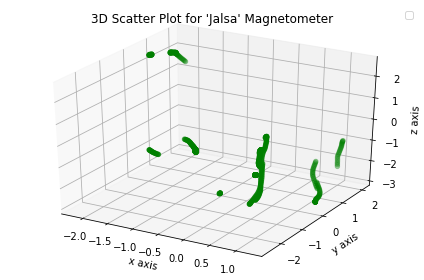

In [ ]:
#Here visualize (Jalsa) Magnetometer data
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
df3=df2.copy()
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
dff=df3[df3['Label']==3]
x = dff['Mag_X']
y = dff['Mag_Y']
z = dff['Mag_Z']

ax.scatter( x, y, z, c='#008000')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.title("3D Scatter Plot for 'Jalsa' Magnetometer")
plt.legend()
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


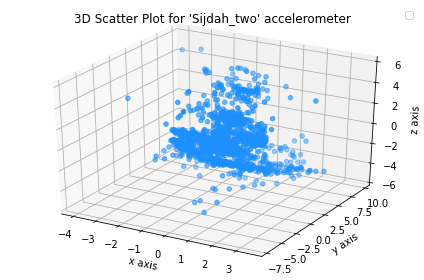

In [ ]:
#Here visualize (Sijdah_two) accelerometer data
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
df3=df2.copy()
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
dff=df3[df3['Label']==4]
x = dff['Acc_X']
y = dff['Acc_Y']
z = dff['Acc_Z']
ax.scatter( x, y, z, c='#1E90FF')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.title("3D Scatter Plot for 'Sijdah_two' accelerometer")
plt.legend()
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


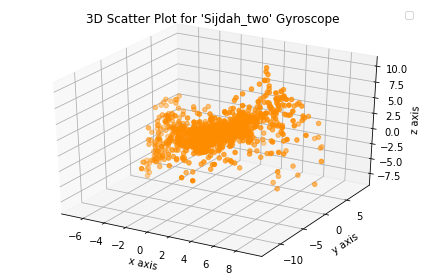

In [ ]:
#Here visualize (Sijdah_two) Gyroscope data
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
df3=df2.copy()
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
dff=df3[df3['Label']==4]
x = dff['Gyro_X']
y = dff['Gyro_Y']
z = dff['Gyro_Z']

ax.scatter( x, y, z, c='#FF8C00')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.title("3D Scatter Plot for 'Sijdah_two' Gyroscope")
plt.legend()
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


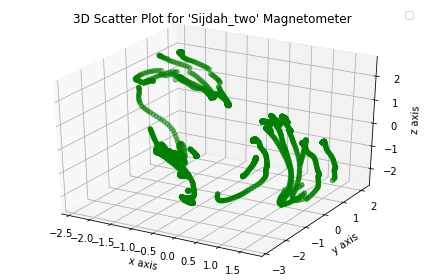

In [ ]:
#Here visualize (Sijdah_two) Magnetometer data
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
df3=df2.copy()
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
dff=df3[df3['Label']==4]
x = dff['Mag_X']
y = dff['Mag_Y']
z = dff['Mag_Z']

ax.scatter( x, y, z, c='#008000')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.title("3D Scatter Plot for 'Sijdah_two' Magnetometer")
plt.legend()
plt.tight_layout()
plt.show()

## Split Dataset & Scalling

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import neighbors
import seaborn as sn
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report

In [ ]:
X = df.iloc[:, 0:9]
y = df.iloc[:, 10]

In [ ]:
from scipy import stats
def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = np.empty(shape=(1,1800)), np.empty(shape=(1))
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        v = v.flatten()
        print(v.shape)
        labels = y.iloc[i: i + time_steps]
        Xs = np.vstack([Xs, v])
        #print(Xs[0].shape)
        ys = np.vstack([ys, stats.mode(labels)[0][0]])
    print(Xs.shape)
    return Xs, np.array(ys).reshape(-1, 1)

In [ ]:
TIME_STEPS = 200
STEP = 10

In [ ]:
X_1, y_1 = create_dataset(
    pd.DataFrame(X),
    y,
    TIME_STEPS,
    STEP
)

(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)
(1800,)


In [ ]:
X_2 = X_1[1:2635]
y_2 = y_1[1:2635]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=.20, random_state=42, shuffle=True, stratify=y_2)

In [ ]:
#Feature Scaling
sc_X = StandardScaler()
x_train = sc_X.fit_transform(X_train)
x_test = sc_X.transform(X_test)

model_accuracy = {}

In [ ]:
def classify(model,x_train,y_train,x_test,y_test):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(classification_report(y_test, y_pred, digits=4))

#KNN

In [ ]:
def knn_error(k,x_train,y_train,x_test,y_test):
    error_rate = []
    K=range(1,k)
    for i in K:
        knn = neighbors.KNeighborsClassifier(n_neighbors = i)
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at k=%s." % (error_rate[kloc], K[kloc]))

    plt.plot(K, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    plt.show()
    return K[kloc]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was

Lowest error is 0.6020797251997451 occurs at k=20.


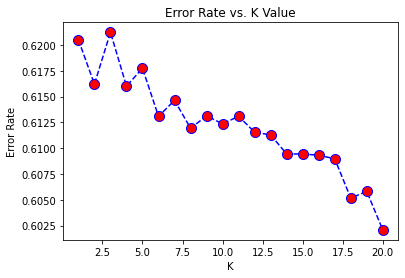

In [ ]:
k=knn_error(21,x_train,y_train,x_test,y_test)

In [ ]:
model = neighbors.KNeighborsClassifier(n_neighbors = 3)
classify(model,x_train,y_train,x_test,y_test)
y_pred = model.predict(x_test)
cmknn = confusion_matrix(y_test, y_pred)
from sklearn import metrics
print( "KNN: {}".format(metrics.accuracy_score(y_test,y_pred)) )

model_accuracy['KNN'] = metrics.accuracy_score(y_test,y_pred)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


              precision    recall  f1-score   support

         0.0     0.9199    1.0000    0.9583       287
         1.0     1.0000    0.6310    0.7737        84
         2.0     0.8696    0.8219    0.8451        73
         3.0     1.0000    1.0000    1.0000        10
         4.0     0.8434    0.9589    0.8974        73

    accuracy                         0.9108       527
   macro avg     0.9266    0.8824    0.8949       527
weighted avg     0.9166    0.9108    0.9055       527

KNN: 0.9108159392789373


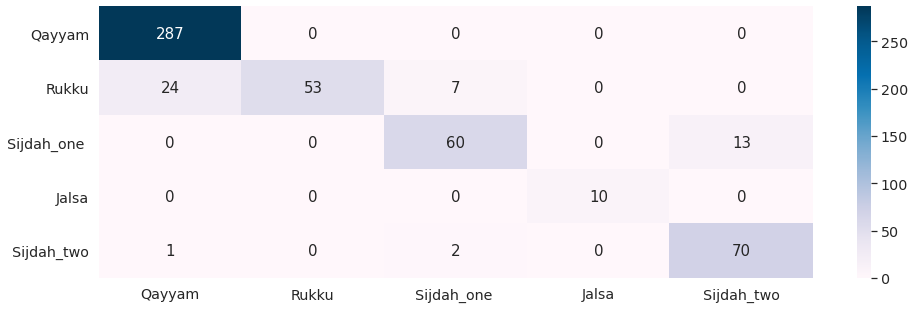

In [ ]:
hmknn = pd.DataFrame(cmknn, 
    index=['Qayyam', 'Rukku', 'Sijdah_one ', 'Jalsa', 'Sijdah_two'], 
    columns=['Qayyam', 'Rukku','Sijdah_one ', 'Jalsa', 'Sijdah_two'],)
plt.figure(figsize = (16,5))
sn.set(font_scale=1.3)
sn.heatmap(hmknn, annot=True,annot_kws={"size":15},fmt='d',cmap="PuBu")

#Naive Bayes

In [ ]:
from sklearn import naive_bayes
model=naive_bayes.GaussianNB()
classify(model,x_train,y_train,x_test,y_test)
y_pred = model.predict(x_test)
cmnb = confusion_matrix(y_test, y_pred)
print( "Naive Bayes: {}".format(metrics.accuracy_score(y_test,y_pred)) )

model_accuracy['Naive Bayes'] = metrics.accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

         0.0     0.9197    0.9582    0.9386       287
         1.0     0.7586    0.5238    0.6197        84
         2.0     0.5781    0.5068    0.5401        73
         3.0     0.4762    1.0000    0.6452        10
         4.0     0.4235    0.4932    0.4557        73

    accuracy                         0.7628       527
   macro avg     0.6312    0.6964    0.6399       527
weighted avg     0.7696    0.7628    0.7601       527

Naive Bayes: 0.7628083491461101


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


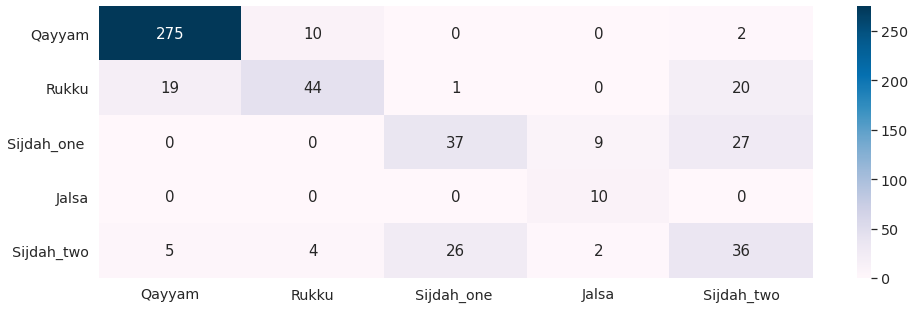

In [ ]:
hmnb = pd.DataFrame(cmnb, 
    index=['Qayyam', 'Rukku', 'Sijdah_one ', 'Jalsa', 'Sijdah_two'], 
    columns=['Qayyam', 'Rukku', 'Sijdah_one ', 'Jalsa', 'Sijdah_two'],)
plt.figure(figsize = (16,5))
sn.set(font_scale=1.3)
sn.heatmap(hmnb, annot=True,annot_kws={"size":15},fmt='d',cmap="PuBu")

#Random Forest Classifier

In [ ]:
from sklearn import ensemble
def rf_error(n,x_train,y_train,x_test,y_test):
    error_rate = []
    e=range(1,n,20)
    for i in e:
        model = ensemble.RandomForestClassifier(n_estimators = i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    nloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at n=%s." % (error_rate[nloc], e[nloc]))

    plt.plot(e, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. n Value')
    plt.xlabel('n')
    plt.ylabel('Error Rate')
    plt.show()
    return e[nloc]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConv

Lowest error is 0.6325626780062579 occurs at n=1.


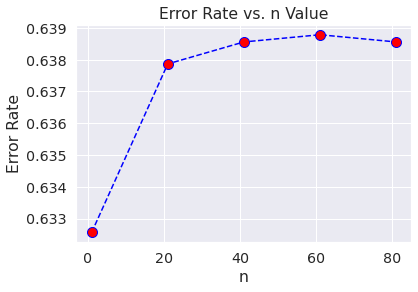

In [ ]:
e=rf_error(100,x_train,y_train,x_test,y_test)

In [ ]:
model=ensemble.RandomForestClassifier(n_estimators = e)
classify(model,x_train,y_train,x_test,y_test)
y_pred = model.predict(x_test)

cmrf = confusion_matrix(y_test, y_pred)

print( "Random Forest: {}".format(metrics.accuracy_score(y_test,y_pred)) )

model_accuracy['Random Forest'] = metrics.accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

         0.0     0.9619    0.9686    0.9653       287
         1.0     0.7683    0.7500    0.7590        84
         2.0     0.7671    0.7671    0.7671        73
         3.0     0.7500    0.3000    0.4286        10
         4.0     0.7215    0.7808    0.7500        73

    accuracy                         0.8672       527
   macro avg     0.7938    0.7133    0.7340       527
weighted avg     0.8668    0.8672    0.8650       527

Random Forest: 0.8671726755218216


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


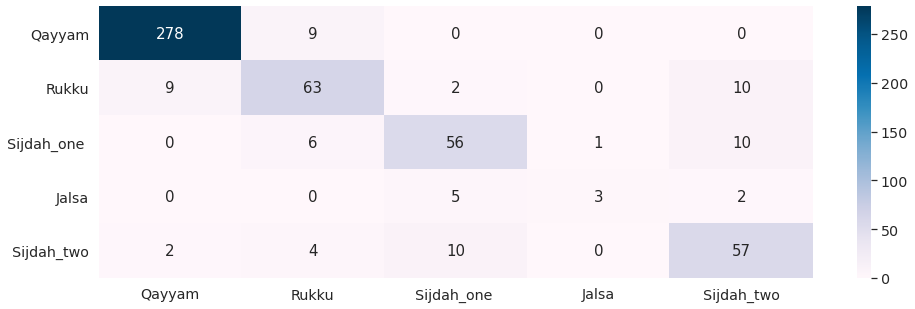

In [ ]:
hmrf = pd.DataFrame(cmrf,
    index=['Qayyam', 'Rukku','Sijdah_one ', 'Jalsa', 'Sijdah_two'], 
    columns=['Qayyam', 'Rukku','Sijdah_one ', 'Jalsa', 'Sijdah_two'],)
plt.figure(figsize = (16,5))
sn.set(font_scale=1.3)
sn.heatmap(hmrf, annot=True,annot_kws={"size":15},fmt='d',cmap="PuBu")

#Support Vector Machine(SVM)

In [ ]:
def svm_kernel(x_train,y_train,x_test,y_test):
    rate=[]
    kernel=['rbf','poly','linear']
    for i in kernel:
        model=svm.SVC(kernel=i).fit(x_train,y_train)
        y_pred=model.predict(x_train)
        print(i, ' in-sample accuracy in SVM: ', accuracy_score(y_train,y_pred))
        y_pred=model.predict(x_test)
        print(i, ' out-of-sample accuracy in SVM: ', accuracy_score(y_test,y_pred))
        rate.append(accuracy_score(y_test,y_pred))
    nloc = rate.index(max(rate))
    print("Highest accuracy is %s occurs at %s kernel." % (rate[nloc], kernel[nloc]))
    return kernel[nloc]

In [ ]:
def svm_error(k,C,x_train,y_train,x_test,y_test):
    error_rate = []
    C=range(1,C)
    for i in C:
        model=svm.SVC(kernel=k,C=i).fit(x_train,y_train)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    cloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at C=%s." % (error_rate[cloc], C[cloc]))

    plt.plot(C, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. C Value')
    plt.xlabel('C')
    plt.ylabel('Error Rate')
    plt.show()
    return C[cloc]

In [ ]:
k=svm_kernel(x_train,y_train,x_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


rbf  in-sample accuracy in SVM:  0.9757949691504508
rbf  out-of-sample accuracy in SVM:  0.9278937381404174


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


poly  in-sample accuracy in SVM:  0.8376839107736118
poly  out-of-sample accuracy in SVM:  0.7969639468690702


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


linear  in-sample accuracy in SVM:  0.9786426198386331
linear  out-of-sample accuracy in SVM:  0.7647058823529411
Highest accuracy is 0.9278937381404174 occurs at rbf kernel.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Lowest error is 0.6377007802570132 occurs at C=2.


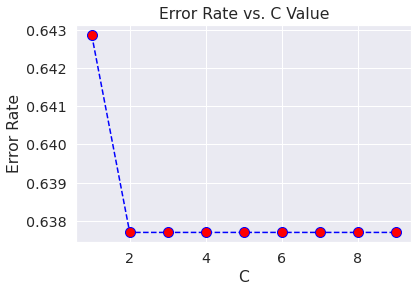

In [ ]:
c=svm_error(k,10,x_train,y_train,x_test,y_test)

In [ ]:
model=svm.SVC(kernel=k,C=c)
classify(model,x_train,y_train,x_test,y_test)
y_pred = model.predict(x_test)
cmsvm = confusion_matrix(y_test, y_pred)
print( "SVM: {}".format(metrics.accuracy_score(y_test,y_pred)) )

model_accuracy['SVM'] = metrics.accuracy_score(y_test,y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0     0.9779    1.0000    0.9888       177
         1.0     0.9804    0.9434    0.9615        53
         2.0     1.0000    0.2727    0.4286        11
         3.0     0.9048    0.7170    0.8000        53
         4.0     0.0000    0.0000    0.0000         5
         5.0     0.6790    0.9322    0.7857        59

    accuracy                         0.9022       358
   macro avg     0.7570    0.6442    0.6608       358
weighted avg     0.9052    0.9022    0.8923       358

SVM: 0.9022346368715084


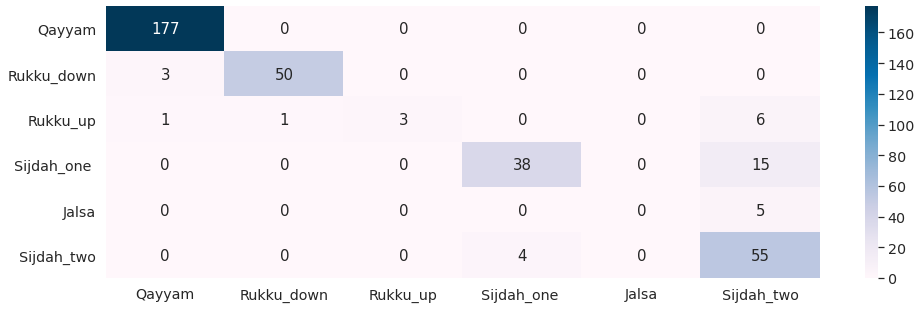

In [ ]:
hmsvm = pd.DataFrame(cmsvm, 
    index=['Qayyam', 'Rukku_down', 'Rukku_up', 'Sijdah_one ', 'Jalsa', 'Sijdah_two'], 
    columns=['Qayyam', 'Rukku_down', 'Rukku_up', 'Sijdah_one ', 'Jalsa', 'Sijdah_two'],)
plt.figure(figsize = (16,5))
sn.set(font_scale=1.3)
sn.heatmap(hmsvm, annot=True,annot_kws={"size":15},fmt='d',cmap="PuBu")

#Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100)
classify(model,x_train,y_train,x_test,y_test)
y_pred = model.predict(x_test)
cmgb = confusion_matrix(y_test, y_pred)
print( "GrBoosting: {}".format(metrics.accuracy_score(y_test,y_pred)) )

model_accuracy['GrBoosting'] = metrics.accuracy_score(y_test,y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         0.0     0.9620    1.0000    0.9806       177
         1.0     0.9804    0.9434    0.9615        53
         2.0     1.0000    0.3636    0.5333        11
         3.0     0.9636    1.0000    0.9815        53
         4.0     1.0000    0.6000    0.7500         5
         5.0     0.9672    1.0000    0.9833        59

    accuracy                         0.9665       358
   macro avg     0.9789    0.8178    0.8650       358
weighted avg     0.9675    0.9665    0.9614       358

GrBoosting: 0.9664804469273743


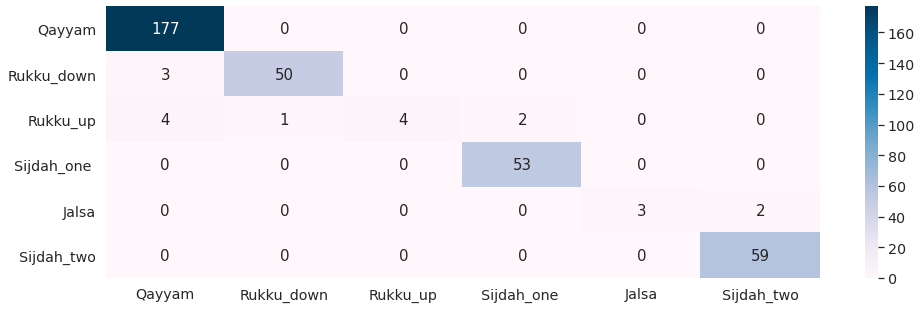

In [ ]:
hmgb = pd.DataFrame(cmgb, 
    index=['Qayyam', 'Rukku_down', 'Rukku_up', 'Sijdah_one ', 'Jalsa', 'Sijdah_two'], 
    columns=['Qayyam', 'Rukku_down', 'Rukku_up', 'Sijdah_one ', 'Jalsa', 'Sijdah_two'],)
plt.figure(figsize = (16,5))
sn.set(font_scale=1.3)
sn.heatmap(hmgb, annot=True,annot_kws={"size":15},fmt='d',cmap="PuBu")

#XGB Classifier

In [ ]:
import xgboost
model = xgboost.XGBClassifier()
classify(model,x_train,y_train,x_test,y_test)
y_pred = model.predict(x_test)
cmxg = confusion_matrix(y_test, y_pred)
print( "XGBoost: {}".format(metrics.accuracy_score(y_test,y_pred)) )

model_accuracy['XGBoost'] = metrics.accuracy_score(y_test,y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         0.0     0.9779    1.0000    0.9888       177
         1.0     0.9804    0.9434    0.9615        53
         2.0     1.0000    0.6364    0.7778        11
         3.0     0.9273    0.9623    0.9444        53
         4.0     0.6000    0.6000    0.6000         5
         5.0     0.9661    0.9661    0.9661        59

    accuracy                         0.9637       358
   macro avg     0.9086    0.8514    0.8731       358
weighted avg     0.9642    0.9637    0.9626       358

XGBoost: 0.9636871508379888


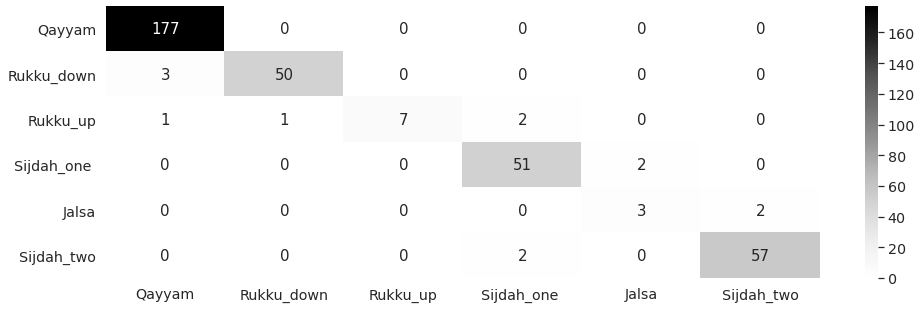

In [ ]:
hmxg = pd.DataFrame(cmxg,
    index=['Qayyam', 'Rukku_down','Rukku_up', 'Sijdah_one ', 'Jalsa', 'Sijdah_two'], 
    columns=['Qayyam', 'Rukku_down','Rukku_up', 'Sijdah_one ', 'Jalsa', 'Sijdah_two'],)
plt.figure(figsize = (16,5))
sn.set(font_scale=1.3)
sn.heatmap(hmxg, annot=True,annot_kws={"size":15},fmt='d',cmap="Greys")

#All Model accuracy


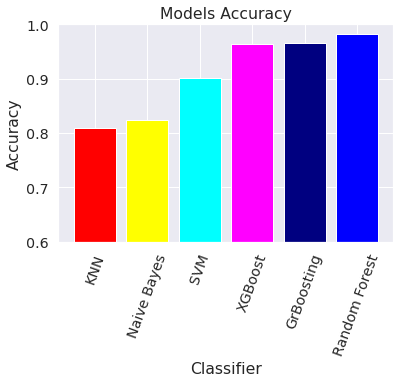

In [ ]:
#Models Accuracy             
from collections import OrderedDict
model_accuracy = OrderedDict(sorted(model_accuracy.items(), key=lambda t: t[1]))
plt.bar(range(len(model_accuracy)), model_accuracy.values(),align='center', color=['#FF0000', '#FFFF00', '#00FFFF', '#FF00FF', '#000080', '#0000FF', '#00FF00'])
plt.xticks(range(len(model_accuracy)), model_accuracy.keys(), rotation =70)
axes = plt.gca()
axes.set_ylim([.6,1.0])
plt.xlabel('Classifier') 
plt.ylabel('Accuracy')
plt.title("Models Accuracy")
plt.show()